# DAY 10: Bayesian model of regression


### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: August 6th, 2:00 pm Kigali Time

**First name**: LONGIN


**Last name**: DUSENGEYEZU

**ID**:220020609

## Learning Goals:

1. understand the effect of priors and number of data observations on the posterior
2. understand how to interpret the posterior predictive 

### Load necessary libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from autograd import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

### We include auxiliary functions here that we will need to use later 

**No need to read in details!**

In [ ]:
def get_posterior_samples(prior_var, noise_var, x_matrix, y_matrix, x_test_matrix, samples=100):
  prior_variance = np.diag(prior_var * np.ones(x_matrix.shape[1]))
  prior_precision = np.linalg.inv(prior_variance)

  epsilon = 1e-5
  joint_precision = prior_precision + x_matrix.T.dot(x_matrix) / noise_var
  joint_variance = np.linalg.inv(joint_precision + epsilon * np.ones(x_matrix.shape[1])) 
  joint_mean = joint_variance.dot(x_matrix.T.dot(y_matrix)) / noise_var

  #sampling 100 points from the posterior
  posterior_samples = np.random.multivariate_normal(joint_mean.flatten(), joint_variance, size=samples)

  #take posterior predictive samples
  posterior_predictions = np.dot(posterior_samples, x_test_matrix.T) 
  posterior_predictive_samples = posterior_predictions + np.random.normal(0, noise_var**0.5, size=posterior_predictions.shape)

  return posterior_predictions, posterior_predictive_samples

def generate_data(number_of_points=10, noise_variance=0.5):
  #training x
  x = np.hstack((np.linspace(-10, -5, number_of_points), np.linspace(5, 10, number_of_points)))
  #function relating x and y
  f = lambda x:  0.01 * x**3
  #y is equal to f(x) plus gaussian noise
  y = f(x) + np.random.normal(0, noise_variance**0.5, 2 * N)
  x_test = np.linspace(-11, 11, 100)
  return x, y, x_test
  

## Build a Bayesian Model for Polynomial Regression
Recall that  a Bayesian model for polynomial regression has two pieces, the likelihood and the prior:
\begin{align}
y &= f_w(x) + \epsilon,\; \epsilon \sim \mathcal{N}(0, \sigma^2),\\
w &\sim \mathcal{N}(0, \sigma_w^2 I)
\end{align}
where $I$ is a $DxD$ identity matrix, and $D$ is the number of parameters in $f_w$.

The posterior of this Bayesian model $p(w | \mathrm{Data})$ gives us a **distribution over likely model parameters** for the data, and thus, a **distribution over models** for the data. The posterior predictive gives us a distribution over predictions for any input $x$.

**Exercise 1:** Explain the meaning of 0 in $\mathcal{N}(0, \sigma_w^2 I)$ in terms of prior beliefs about the model -- what do we believe about $w$? Explain $\sigma_w^2$ in terms of uncertainty in our prior beliefs about the model -- how confidence are we in our beliefs about $w$ if $\sigma_w^2=1$ or $\sigma_w^2 = 10$?

**Answer**: 

Simply   if variance increases also uncertain increase but confidence about prior beliefs decrease, when variance decrease also uncertain decrease but confidence about prior beliefs increases

in this case We believe that w takes very small values from this assumption of its being a normal distribution with mean=0. We are more confident in our prior beliefs for a variance of w=1, and we are more uncertain about our prior beliefs for w on variance of variance (w)=10.

#### Let's generate some data

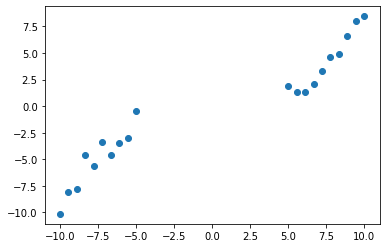

In [ ]:
# number of data points in each of the two segments of the domain
N = 10
# noise level in the data
noise_variance = 1.

# generate toy data
x_train, y_train, x_test = generate_data(number_of_points=N, noise_variance=noise_variance)
plt.scatter(x_train, y_train)



**Exercise 2:** Fit a Bayesian polynomial regression model of degree 15 to the small provided dataset. Visualize the posterior predictive. Using this visualization, summarize where the model is the most confident in its predictions and where it is least confident.

Can you explain why the model is not confident in certain places but confident in others?

**Answer**:

By visualize the posterior predictive  we observe that from -10 up to -5 our model is less uncertain means that confidence is very higher, from -5 up to 0  our model is more uncertain means that confidence is low higher, the same as from 55 up to 0. But from 10 up to 10 our model is less uncertain means that confidence is very higher


The model is less confident in areas where there is no data. This is because, the model cannot be certain in the prediction of points that it has not seen. On the contrary, the model seems quite confident in areas where data actually exists
Also wen observe very well on where x coordinate is equal to zero and where y coordinate is equal to 0 we that we are less uncertain since we  know very well if mean is equal to zero our w will be very small also all model pass in coordinate (0,0)


In [ ]:
# Step 1: make an instance of the PolynomialFeatures model
poly = PolynomialFeatures(15)

# Step 2: fit our PolynomialFeatures to our data and add add polynomial powers to our covariates
x_train_poly = poly.fit_transform(x_train.reshape((-1, 1)))
x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))

In [ ]:
# Step 3: define the variance of the prior distribution
prior_variance = 1
# Step 4: define the number of samples to take from the posterior
samples = 100

# Step 5: get samples from the posterior predictive
posterior_predictions, posterior_predictive_samples = get_posterior_samples(prior_variance, noise_variance, x_train_poly, y_train.reshape((-1, 1)), x_test_poly, samples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# Step 6: compute the 97.5 th percentile of the posterior predictive predictions
pp_upper = np.percentile(posterior_predictive_samples, 97.5, axis=0)

# Step 7: compute the 2.5 th percentile of the posterior predictive predictions
pp_lower = np.percentile(posterior_predictive_samples, 2.5, axis=0)

# Step 8: compute the 50 th percentile of the posterior predictive predictions
pp_mean = np.mean(posterior_predictive_samples, axis=0)

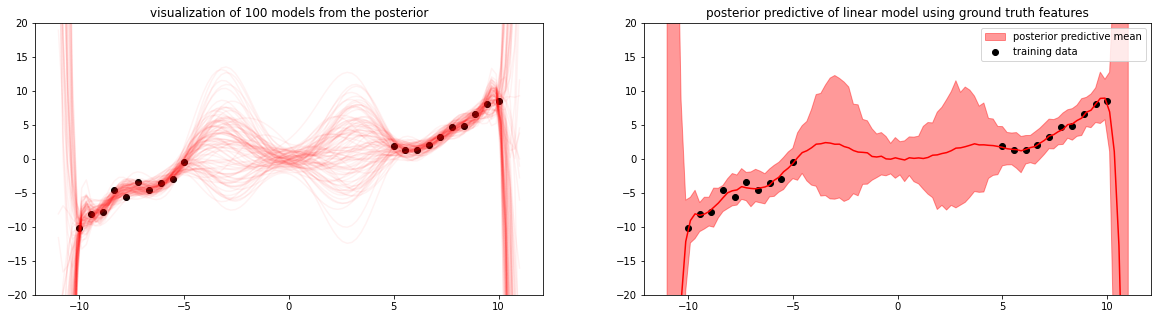

In [ ]:
# Step 9: Visualize the posterior predictive distribution
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# visualize the training data 
ax[0].scatter(x_train, y_train, color='black', label='training data') 

# visualize each model from the posterior
for sample in posterior_predictions:
    ax[0].plot(x_test, sample, color='red', alpha=0.05)

ax[0].set_ylim([-20, 20])
ax[0].set_title('visualization of {} models from the posterior'.format(samples))

# visualize the mean of the posterior predictive
ax[1].plot(x_test, pp_mean, color='red')
# visualize the 95% posterior predictive interval
ax[1].fill_between(x_test, pp_upper, pp_lower, color='red', alpha=0.4, label='posterior predictive mean')
# visualize the training data
ax[1].scatter(x_train, y_train, color='black', label='training data')

ax[1].legend(loc='best')
ax[1].set_title('posterior predictive of linear model using ground truth features')
ax[1].set_ylim([-20, 20])
plt.show()

**Exercise 3:** Change the prior variance $\sigma^2_w$ to 0.001 and visualize the posterior predictive. Change the prior variance $\sigma^2_w$ to 50 and visualize the posterior predictive. 

What is the effect of the prior variance on the posterior predictive? Why does the prior affect the posterior predictive in this way? Relate your answers to uncertainties.

**Answer**:


a)From previous statement we have seen that as variance decrease also uncertainty decrease to reduce it to 0.001 Cause bandwidth of posterior predictive to be reduce at all point even where there is no data because we assume in our prior belief that variance of w are very small but also uncertainty where there is no data are higher compared to the area where we have data

b)From previous statement we have seen that as variance increase also uncertainty increase to increase it to 50 Cause bandwidth of posterior predictive to be increased at all point even where there is no data because we assume in our prior belief that variance of w are very higher but also uncertainty where there is no data are higher compared to the area where we have data

**NB: The prior variance affects the thickness of the posterior predictive band. This is because the prior variance affects the uncertainty of the posterior predictive. The posterior predictive becomes wider on areas on high uncertainty**



## Variance $\sigma^2_w$  0.001


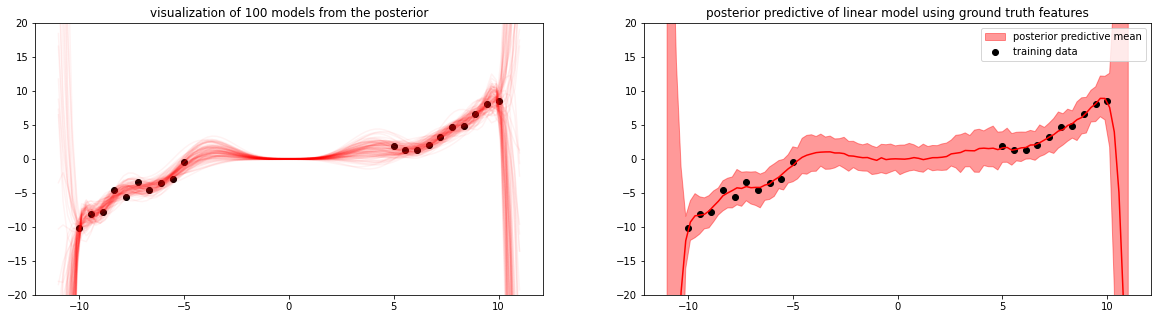

In [ ]:
# Step 1: make an instance of the PolynomialFeatures model
poly = PolynomialFeatures(15)

# Step 2: fit our PolynomialFeatures to our data and add add polynomial powers to our covariates
x_train_poly = poly.fit_transform(x_train.reshape((-1, 1)))
x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))

# Step 3: define the variance of the prior distribution
prior_variance = 0.001
# Step 4: define the number of samples to take from the posterior
samples = 100

# Step 5: get samples from the posterior predictive
posterior_predictions, posterior_predictive_samples = get_posterior_samples(prior_variance, noise_variance, x_train_poly, y_train.reshape((-1, 1)), x_test_poly, samples)

# Step 6: compute the 97.5 th percentile of the posterior predictive predictions
pp_upper = np.percentile(posterior_predictive_samples, 97.5, axis=0)

# Step 7: compute the 2.5 th percentile of the posterior predictive predictions
pp_lower = np.percentile(posterior_predictive_samples, 2.5, axis=0)

# Step 8: compute the 50 th percentile of the posterior predictive predictions
pp_mean = np.mean(posterior_predictive_samples, axis=0)

# Step 9: Visualize the posterior predictive distribution
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# visualize the training data 
ax[0].scatter(x_train, y_train, color='black', label='training data') 

# visualize each model from the posterior
for sample in posterior_predictions:
    ax[0].plot(x_test, sample, color='red', alpha=0.05)

ax[0].set_ylim([-20, 20])
ax[0].set_title('visualization of {} models from the posterior'.format(samples))

# visualize the mean of the posterior predictive
ax[1].plot(x_test, pp_mean, color='red')
# visualize the 95% posterior predictive interval
ax[1].fill_between(x_test, pp_upper, pp_lower, color='red', alpha=0.4, label='posterior predictive mean')
# visualize the training data
ax[1].scatter(x_train, y_train, color='black', label='training data')

ax[1].legend(loc='best')
ax[1].set_title('posterior predictive of linear model using ground truth features')
ax[1].set_ylim([-20, 20])
plt.show()

## Variance $\sigma^2_w$  50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


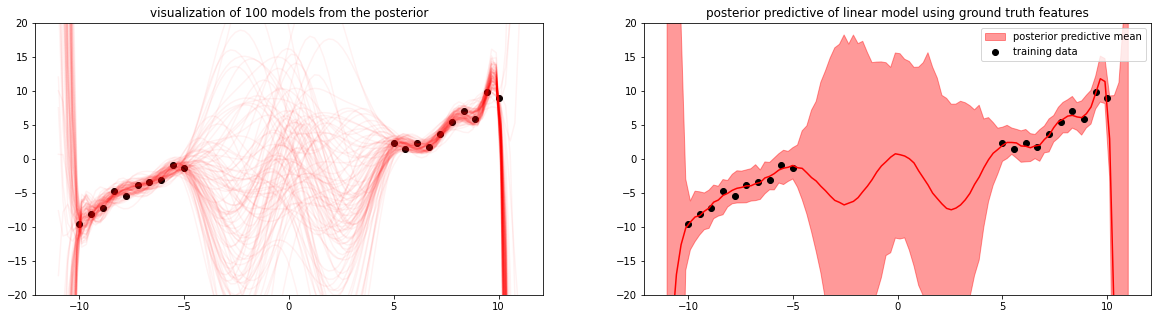

In [ ]:
# Step 1: make an instance of the PolynomialFeatures model
poly = PolynomialFeatures(15)

# Step 2: fit our PolynomialFeatures to our data and add add polynomial powers to our covariates
x_train_poly = poly.fit_transform(x_train.reshape((-1, 1)))
x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))

# Step 3: define the variance of the prior distribution
prior_variance = 50
# Step 4: define the number of samples to take from the posterior
samples = 100

# Step 5: get samples from the posterior predictive
posterior_predictions, posterior_predictive_samples = get_posterior_samples(prior_variance, noise_variance, x_train_poly, y_train.reshape((-1, 1)), x_test_poly, samples)

# Step 6: compute the 97.5 th percentile of the posterior predictive predictions
pp_upper = np.percentile(posterior_predictive_samples, 97.5, axis=0)

# Step 7: compute the 2.5 th percentile of the posterior predictive predictions
pp_lower = np.percentile(posterior_predictive_samples, 2.5, axis=0)

# Step 8: compute the 50 th percentile of the posterior predictive predictions
pp_mean = np.mean(posterior_predictive_samples, axis=0)

# Step 9: Visualize the posterior predictive distribution
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# visualize the training data 
ax[0].scatter(x_train, y_train, color='black', label='training data') 

# visualize each model from the posterior
for sample in posterior_predictions:
    ax[0].plot(x_test, sample, color='red', alpha=0.05)

ax[0].set_ylim([-20, 20])
ax[0].set_title('visualization of {} models from the posterior'.format(samples))

# visualize the mean of the posterior predictive
ax[1].plot(x_test, pp_mean, color='red')
# visualize the 95% posterior predictive interval
ax[1].fill_between(x_test, pp_upper, pp_lower, color='red', alpha=0.4, label='posterior predictive mean')
# visualize the training data
ax[1].scatter(x_train, y_train, color='black', label='training data')

ax[1].legend(loc='best')
ax[1].set_title('posterior predictive of linear model using ground truth features')
ax[1].set_ylim([-20, 20])
plt.show()

**Exercise 4:** Change the number of data points $N$ in the dataset to 500 and visualize the posterior predictive. 

What is the effect of the number of data observations $N$ on the posterior predictive? Why does the number of data points $N$ affect the posterior predictive in this way? Support your answer with concepts from lecture.

**Answer**:

Increasing number of data observations to 500 reduce uncertainty in a posterior predictive whatever where there is data or where there is no data. But also uncertainty where there is no data is higher compared to where we have data

Increasing the number of data observations makes the likelihood to dominate. This is because with increase in data points, the biasing effect of the prior is washed away
This means that increasing data observations we are reducing effect of prior belief 


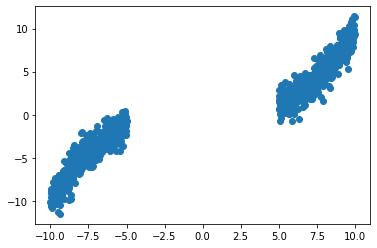

In [ ]:
# number of data points in each of the two segments of the domain
N = 500
# noise level in the data
noise_variance = 1.

# generate toy data
x_train, y_train, x_test = generate_data(number_of_points=N, noise_variance=noise_variance)
plt.scatter(x_train, y_train)

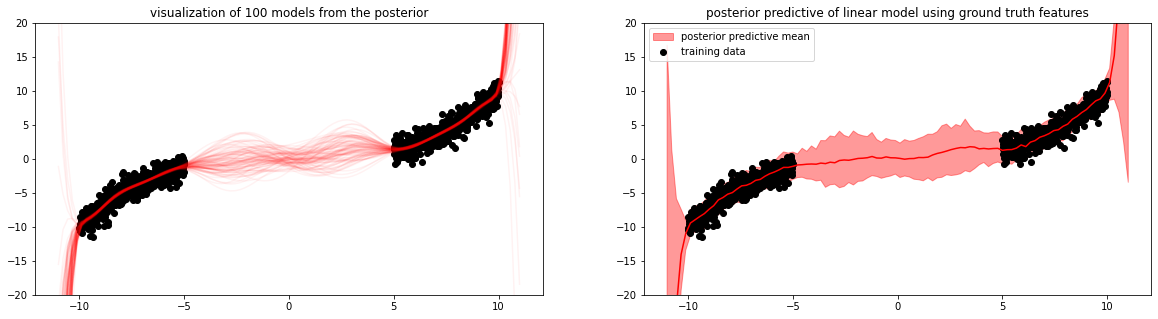

In [ ]:
# Step 1: make an instance of the PolynomialFeatures model
poly = PolynomialFeatures(15)

# Step 2: fit our PolynomialFeatures to our data and add add polynomial powers to our covariates
x_train_poly = poly.fit_transform(x_train.reshape((-1, 1)))
x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))

# Step 3: define the variance of the prior distribution
prior_variance = 1.
# Step 4: define the number of samples to take from the posterior
samples = 100

# Step 5: get samples from the posterior predictive
posterior_predictions, posterior_predictive_samples = get_posterior_samples(prior_variance, noise_variance, x_train_poly, y_train.reshape((-1, 1)), x_test_poly, samples)

# Step 6: compute the 97.5 th percentile of the posterior predictive predictions
pp_upper = np.percentile(posterior_predictive_samples, 97.5, axis=0)

# Step 7: compute the 2.5 th percentile of the posterior predictive predictions
pp_lower = np.percentile(posterior_predictive_samples, 2.5, axis=0)

# Step 8: compute the 50 th percentile of the posterior predictive predictions
pp_mean = np.mean(posterior_predictive_samples, axis=0)

# Step 9: Visualize the posterior predictive distribution
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# visualize the training data 
ax[0].scatter(x_train, y_train, color='black', label='training data') 

# visualize each model from the posterior
for sample in posterior_predictions:
    ax[0].plot(x_test, sample, color='red', alpha=0.05)

ax[0].set_ylim([-20, 20])
ax[0].set_title('visualization of {} models from the posterior'.format(samples))

# visualize the mean of the posterior predictive
ax[1].plot(x_test, pp_mean, color='red')
# visualize the 95% posterior predictive interval
ax[1].fill_between(x_test, pp_upper, pp_lower, color='red', alpha=0.4, label='posterior predictive mean')
# visualize the training data
ax[1].scatter(x_train, y_train, color='black', label='training data')

ax[1].legend(loc='best')
ax[1].set_title('posterior predictive of linear model using ground truth features')
ax[1].set_ylim([-20, 20])
plt.show()

**Exercise 5:** Change the noise variance $\sigma^2_y$ of the dataset to 10 and visualize the posterior predictive. Change the noise variance $\sigma^2_y$ of the dataset to 0.001 and visualize the posterior predictive. 

What is the effect of the noise variance $\sigma^2_y$ on the posterior predictive? Why does the noise variance $\sigma^2_y$ affect the posterior predictive in this way? Support your answer with concepts from lecture.

**Answer**:
Increasing the noise variance in data set makes the posterior predictive to be wider in many regions of the dataset. Reducing the noise variance makes the posterior predictive to be thinner in most areas. 

The logic behind this observation is that increasing noise variance increases uncertainty, hence the wider regions for the posterior predictive. On the other hand, reducing the noise variance, increases certainty, hence the slimmer regions for our posterior predictive.

General intuitive is that since dataset have more variability will produce more uncertainty posterior predictive, on other hand will reduce uncertainty posterior predictive



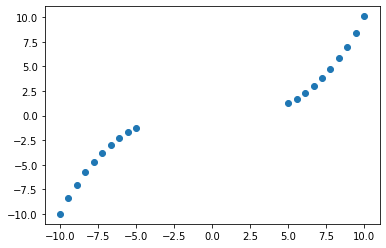

In [ ]:
# number of data points in each of the two segments of the domain
N = 10
# noise level in the data
noise_variance = 0.001

# generate toy data
x_train, y_train, x_test = generate_data(number_of_points=N, noise_variance=noise_variance)
plt.scatter(x_train, y_train)

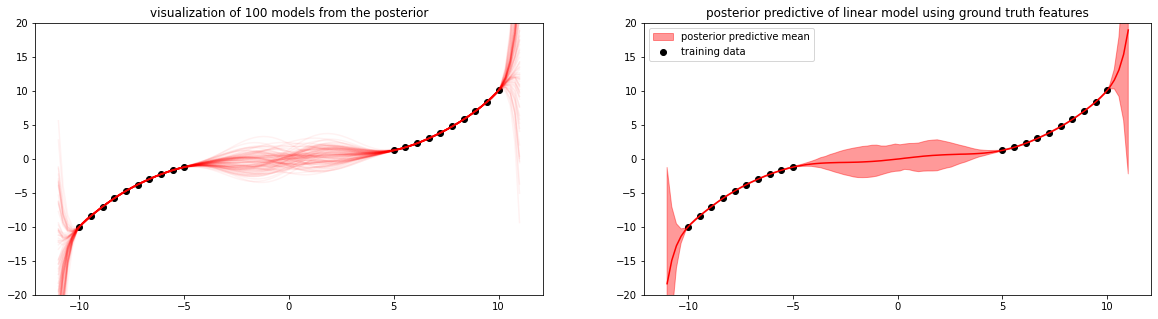

In [ ]:
# Step 1: make an instance of the PolynomialFeatures model
poly = PolynomialFeatures(15)

# Step 2: fit our PolynomialFeatures to our data and add add polynomial powers to our covariates
x_train_poly = poly.fit_transform(x_train.reshape((-1, 1)))
x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))

# Step 3: define the variance of the prior distribution
prior_variance = 1
# Step 4: define the number of samples to take from the posterior
samples = 100

# Step 5: get samples from the posterior predictive
posterior_predictions, posterior_predictive_samples = get_posterior_samples(prior_variance, noise_variance, x_train_poly, y_train.reshape((-1, 1)), x_test_poly, samples)

# Step 6: compute the 97.5 th percentile of the posterior predictive predictions
pp_upper = np.percentile(posterior_predictive_samples, 97.5, axis=0)

# Step 7: compute the 2.5 th percentile of the posterior predictive predictions
pp_lower = np.percentile(posterior_predictive_samples, 2.5, axis=0)

# Step 8: compute the 50 th percentile of the posterior predictive predictions
pp_mean = np.mean(posterior_predictive_samples, axis=0)

# Step 9: Visualize the posterior predictive distribution
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# visualize the training data 
ax[0].scatter(x_train, y_train, color='black', label='training data') 

# visualize each model from the posterior
for sample in posterior_predictions:
    ax[0].plot(x_test, sample, color='red', alpha=0.05)

ax[0].set_ylim([-20, 20])
ax[0].set_title('visualization of {} models from the posterior'.format(samples))

# visualize the mean of the posterior predictive
ax[1].plot(x_test, pp_mean, color='red')
# visualize the 95% posterior predictive interval
ax[1].fill_between(x_test, pp_upper, pp_lower, color='red', alpha=0.4, label='posterior predictive mean')
# visualize the training data
ax[1].scatter(x_train, y_train, color='black', label='training data')

ax[1].legend(loc='best')
ax[1].set_title('posterior predictive of linear model using ground truth features')
ax[1].set_ylim([-20, 20])
plt.show()

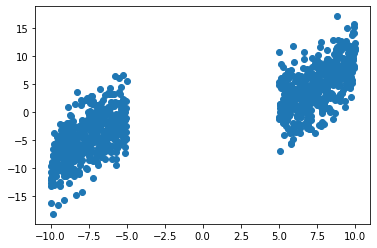

In [ ]:
# number of data points in each of the two segments of the domain
N = 500
# noise level in the data
noise_variance = 10

# generate toy data
x_train, y_train, x_test = generate_data(number_of_points=N, noise_variance=noise_variance)
plt.scatter(x_train, y_train)

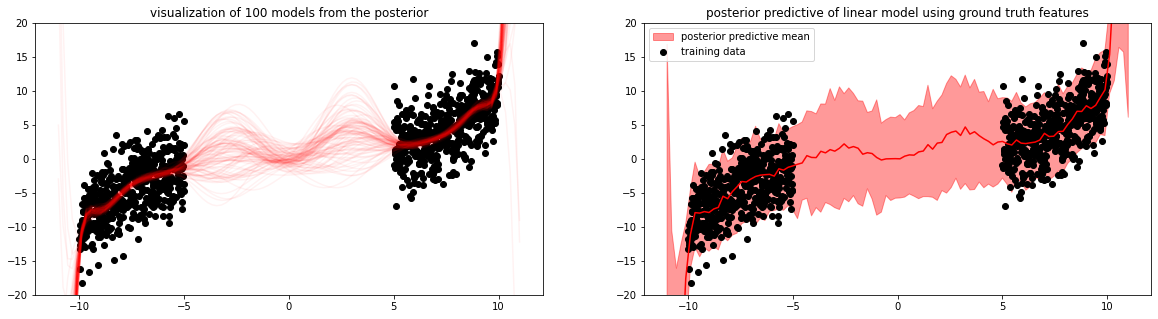

In [ ]:
# Step 1: make an instance of the PolynomialFeatures model
poly = PolynomialFeatures(15)

# Step 2: fit our PolynomialFeatures to our data and add add polynomial powers to our covariates
x_train_poly = poly.fit_transform(x_train.reshape((-1, 1)))
x_test_poly = poly.fit_transform(x_test.reshape((-1, 1)))

# Step 3: define the variance of the prior distribution
prior_variance = 1
# Step 4: define the number of samples to take from the posterior
samples = 100

# Step 5: get samples from the posterior predictive
posterior_predictions, posterior_predictive_samples = get_posterior_samples(prior_variance, noise_variance, x_train_poly, y_train.reshape((-1, 1)), x_test_poly, samples)

# Step 6: compute the 97.5 th percentile of the posterior predictive predictions
pp_upper = np.percentile(posterior_predictive_samples, 97.5, axis=0)

# Step 7: compute the 2.5 th percentile of the posterior predictive predictions
pp_lower = np.percentile(posterior_predictive_samples, 2.5, axis=0)

# Step 8: compute the 50 th percentile of the posterior predictive predictions
pp_mean = np.mean(posterior_predictive_samples, axis=0)

# Step 9: Visualize the posterior predictive distribution
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# visualize the training data 
ax[0].scatter(x_train, y_train, color='black', label='training data') 

# visualize each model from the posterior
for sample in posterior_predictions:
    ax[0].plot(x_test, sample, color='red', alpha=0.05)

ax[0].set_ylim([-20, 20])
ax[0].set_title('visualization of {} models from the posterior'.format(samples))

# visualize the mean of the posterior predictive
ax[1].plot(x_test, pp_mean, color='red')
# visualize the 95% posterior predictive interval
ax[1].fill_between(x_test, pp_upper, pp_lower, color='red', alpha=0.4, label='posterior predictive mean')
# visualize the training data
ax[1].scatter(x_train, y_train, color='black', label='training data')

ax[1].legend(loc='best')
ax[1].set_title('posterior predictive of linear model using ground truth features')
ax[1].set_ylim([-20, 20])
plt.show()